# Start of PCA

In [67]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/scantronMath_38_encoded.csv')


In [68]:
one_hot_encoded_df2.head()

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies,subject_music,subject_art,subject_performing-arts,subject_phys-ed,subject_career-prep
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,False,True,False,False,False,0,0,0.957757,2,2,2,2,1,0,0,0,0
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,False,True,False,False,False,0,0,0.949346,2,2,2,1,0,0,0,0,0
2,44784,6,value_scantronMath,True,1.021622,False,False,False,False,False,True,False,False,False,0,0,0.990132,2,2,2,2,1,0,0,0,0
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,False,True,False,False,False,0,0,1.035514,2,2,1,2,0,0,0,0,0
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,False,True,False,False,False,0,0,0.934393,2,2,2,2,1,0,0,0,0


In [69]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'level',
 'dataSource',
 'is_proficient',
 'proficient_score',
 'school_Elementary A',
 'school_Elementary School B',
 'school_Elementary School E',
 'school_Elementary School F',
 'school_Intermediate School E',
 'school_Middle School A',
 'school_Middle School C',
 'school_Middle School D',
 'school_Middle School F',
 'iready_math',
 'iready_reading',
 'past_proficient_score',
 'subject_math',
 'subject_reading',
 'subject_science',
 'subject_social-studies',
 'subject_music',
 'subject_art',
 'subject_performing-arts',
 'subject_phys-ed',
 'subject_career-prep']

In [70]:
#drop ID and binary column
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'is_proficient'])

In [71]:
one_hot_encoded_df2 = one_hot_encoded_df2[one_hot_encoded_df2['dataSource'] == 'value_scantronMath'].drop(columns=['dataSource'])


In [72]:
one_hot_encoded_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20571 entries, 0 to 20570
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   level                         20571 non-null  int64  
 1   proficient_score              20571 non-null  float64
 2   school_Elementary A           20571 non-null  bool   
 3   school_Elementary School B    20571 non-null  bool   
 4   school_Elementary School E    20571 non-null  bool   
 5   school_Elementary School F    20571 non-null  bool   
 6   school_Intermediate School E  20571 non-null  bool   
 7   school_Middle School A        20571 non-null  bool   
 8   school_Middle School C        20571 non-null  bool   
 9   school_Middle School D        20571 non-null  bool   
 10  school_Middle School F        20571 non-null  bool   
 11  iready_math                   20571 non-null  int64  
 12  iready_reading                20571 non-null  int64  
 13  p

In [73]:
# Find columns with null values and print their names
null_columns = one_hot_encoded_df2.columns[one_hot_encoded_df2.isnull().any()]

# Print the columns that have null values
print(null_columns)


Index(['past_proficient_score'], dtype='object')


In [74]:
one_hot_encoded_df2.shape

(20571, 23)

In [75]:
one_hot_encoded_df2['past_proficient_score']

0        0.957757
1        0.949346
2        0.990132
3        1.035514
4        0.934393
           ...   
20566         NaN
20567         NaN
20568         NaN
20569         NaN
20570    0.913837
Name: past_proficient_score, Length: 20571, dtype: float64

In [76]:
one_hot_encoded_df2 = one_hot_encoded_df2.dropna(subset=['past_proficient_score'])

In [77]:
one_hot_encoded_df2.shape

(15149, 23)

## PCA

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['proficient_score']))

In [79]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 11
Cumulative explained variance: 0.8057166567197405


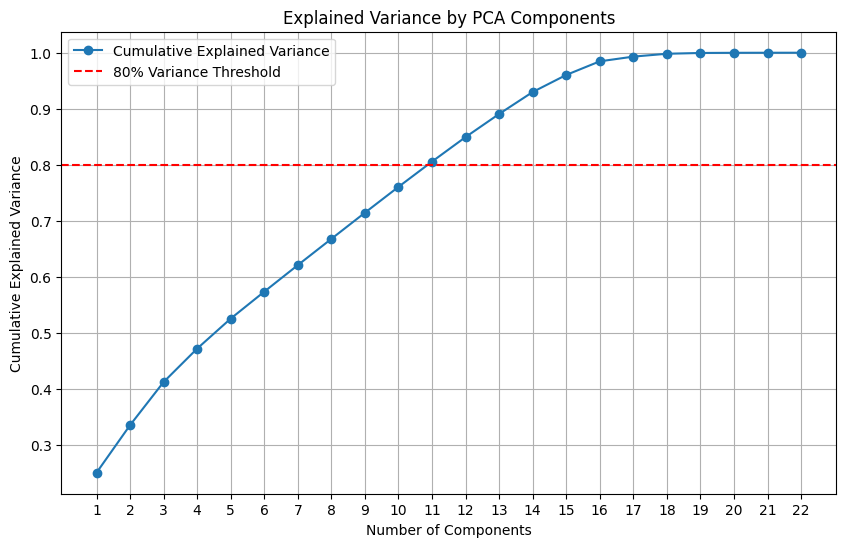

Number of components needed: 11


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 85% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [81]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [82]:
first_11_pcs_df = X_pca_df.iloc[:, :11].copy()

In [83]:
first_11_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,3.795431,0.033161,5.485519,7.304418,-1.017066,-1.583806,0.548918,-0.555618,-0.588905,-0.001698,-1.846600
1,2.624093,-0.032177,2.593691,3.460747,-0.496110,-1.720084,1.101784,-0.586566,-0.684862,-0.029995,-0.987918
2,3.809118,-0.041872,5.040625,7.520256,-1.075486,-1.496337,0.439741,-0.646995,-0.666106,-0.002692,-1.880766
3,2.622274,-0.219951,2.161943,3.740966,-0.588818,-1.303365,1.034051,-0.706999,-0.842685,-0.048906,-1.019700
4,3.792074,0.084095,5.520838,7.261498,-0.991159,-1.687556,0.581788,-0.511999,-0.537526,0.003443,-1.834834
...,...,...,...,...,...,...,...,...,...,...,...
15144,-1.347282,-0.394297,0.793845,-0.373071,0.081824,-0.003603,0.169174,0.115660,0.070263,-0.006214,0.061501
15145,-1.327979,-0.687088,0.590819,-0.126348,-0.067100,0.592795,-0.019777,-0.135082,-0.225085,-0.035769,-0.006133
15146,-1.307815,-0.462683,-0.825035,0.294997,-0.033979,-0.125785,-0.117976,-0.051379,-0.004771,0.013205,-0.021631
15147,-1.306910,-0.476408,-0.834552,0.306562,-0.040960,-0.097828,-0.126834,-0.063133,-0.018616,0.011820,-0.024801


In [84]:
'''
import os
import pandas as pd

# Assuming first_55_pcs_df is already defined
# Create the 'data/model' directory if it doesn't exist
os.makedirs('data/model', exist_ok=True)

# Save the DataFrame as a CSV file
first_55_pcs_df.to_csv('data/model/first_55_pcs_df.csv', index=False)
'''

"\nimport os\nimport pandas as pd\n\n# Assuming first_55_pcs_df is already defined\n# Create the 'data/model' directory if it doesn't exist\nos.makedirs('data/model', exist_ok=True)\n\n# Save the DataFrame as a CSV file\nfirst_55_pcs_df.to_csv('data/model/first_55_pcs_df.csv', index=False)\n"

In [85]:
'''
import pandas as pd

# Read the CSV file into a DataFrame
first_55_pcs_df = pd.read_csv('data/model/first_55_pcs_df.csv')

# Display the first few rows of the DataFrame to confirm it's loaded
print(first_55_pcs_df.head())
'''

"\nimport pandas as pd\n\n# Read the CSV file into a DataFrame\nfirst_55_pcs_df = pd.read_csv('data/model/first_55_pcs_df.csv')\n\n# Display the first few rows of the DataFrame to confirm it's loaded\nprint(first_55_pcs_df.head())\n"

In [86]:
import numpy as np

# Assuming pca is already fitted and X_scaled is available
# Get the PCA components (loadings)
components = pca.components_[:46]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['proficient_score']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['subject_reading', 'subject_science', 'subject_math', 'subject_phys-ed', 'subject_social-studies']
Top features for PC2: ['iready_math', 'iready_reading', 'past_proficient_score', 'subject_phys-ed', 'subject_science']
Top features for PC3: ['level', 'subject_music', 'school_Middle School A', 'school_Intermediate School E', 'school_Middle School F']
Top features for PC4: ['school_Middle School A', 'subject_music', 'school_Middle School D', 'subject_art', 'level']
Top features for PC5: ['school_Middle School F', 'subject_performing-arts', 'subject_art', 'school_Middle School D', 'school_Middle School C']
Top features for PC6: ['school_Middle School C', 'school_Elementary School E', 'past_proficient_score', 'school_Intermediate School E', 'subject_career-prep']
Top features for PC7: ['school_Elementary School E', 'school_Middle School C', 'school_Intermediate School E', 'subject_performing-arts', 'subject_career-prep']
Top features for PC8: ['school_Intermediate Sch

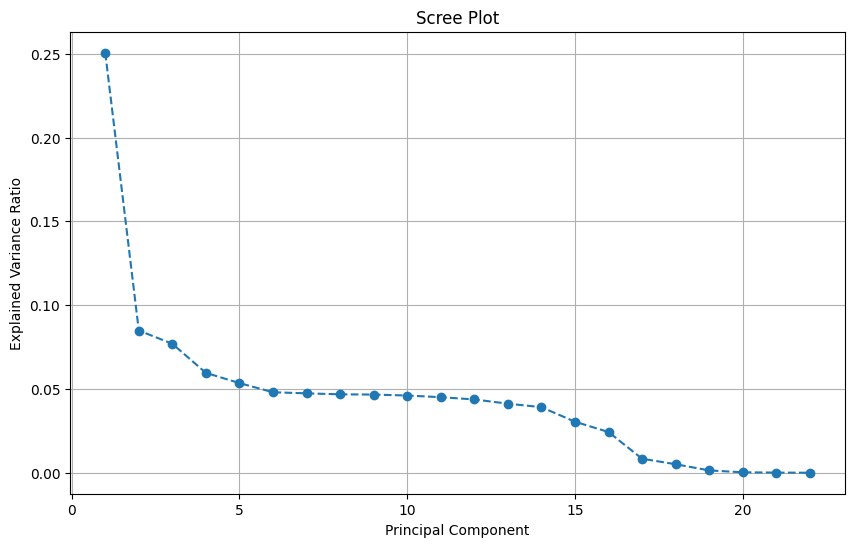

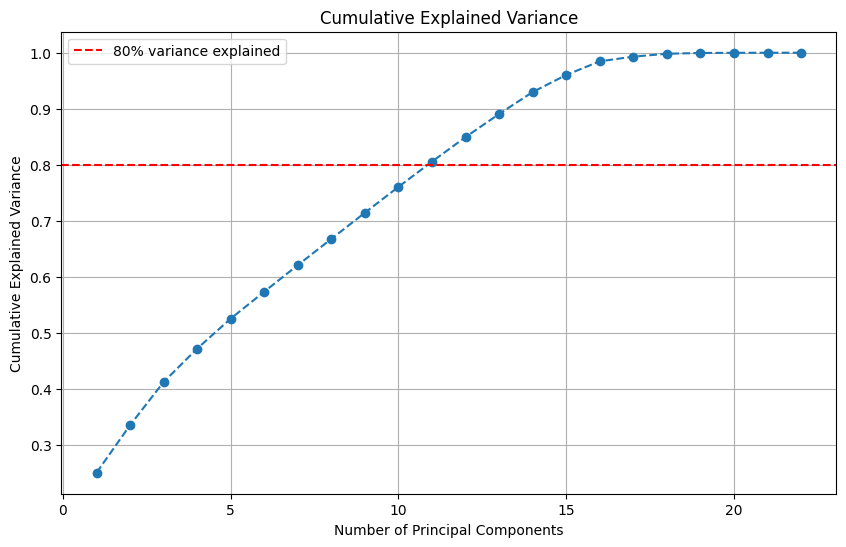

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Start of Catboost

In [88]:

import numpy as np

from sklearn.model_selection import train_test_split
import pandas as pd


In [89]:
X = first_11_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels


In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0722449	test: 0.0757390	best: 0.0757390 (0)	total: 4.86ms	remaining: 2.42s
50:	learn: 0.0460664	test: 0.0534592	best: 0.0534592 (50)	total: 186ms	remaining: 1.63s
100:	learn: 0.0440680	test: 0.0531119	best: 0.0531119 (100)	total: 357ms	remaining: 1.41s
150:	learn: 0.0427627	test: 0.0529816	best: 0.0529816 (149)	total: 513ms	remaining: 1.19s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.05289965857
bestIteration = 187

Shrink model to first 188 iterations.
Mean Squared Error (MSE): 0.00
R-squared (R²): 0.55
Root Mean Squared Error (RMSE): 0.05


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


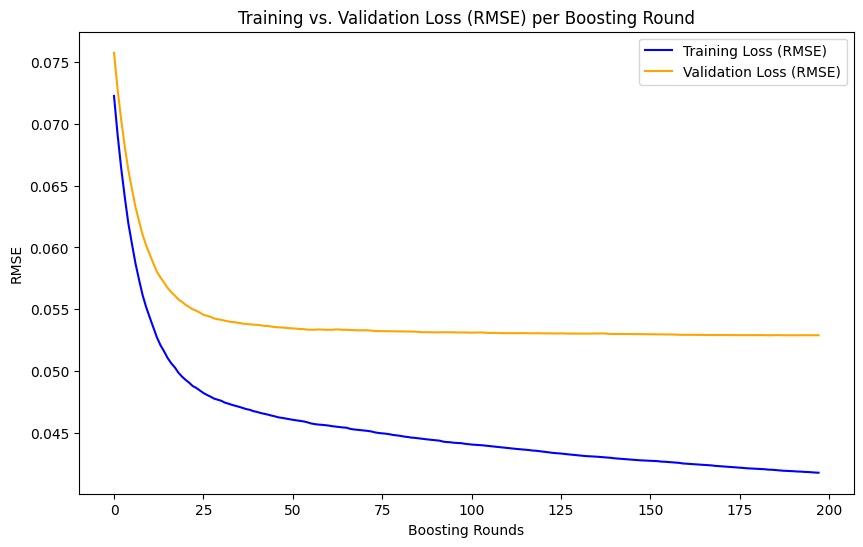

In [91]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model with logging of evaluation metrics
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'  # Set appropriate evaluation metric for regression
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Extract training and validation loss from the evals result
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['RMSE']
validation_loss = eval_history['validation']['RMSE']

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()


In [92]:
import pandas as pd

# Get feature importance from CatBoost
feature_importances = model.get_feature_importance(prettified=True)

# Convert to DataFrame
feature_importances_df = pd.DataFrame(feature_importances)

# Filter for features with importance greater than 1
important_features_gr_2 = feature_importances_df[feature_importances_df['Importances'] > 4]

# Display important features
print("Features with importance > 2:")
important_features_gr_2 


Features with importance > 2:


,Feature Id,Importances
0,PC2,26.705366
1,PC6,21.292375
2,PC9,14.257655
3,PC10,11.334929
4,PC5,8.953525


## top features in each PC

In [96]:
import pandas as pd
import numpy as np

# Assuming pca is already fitted and X_scaled is available
# Get the PCA components (loadings)
components = pca.components_[:11]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(
    components.T, 
    columns=[f'PC{i+1}' for i in range(components.shape[0])],
    index=one_hot_encoded_df2.drop(columns=['proficient_score']).columns
)

# Create a list to store rows for the new DataFrame
top_features_rows = []

# Find the most important features for each principal component
for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features
    top_features = sorted_features.head(5).index.tolist()
    # Add a new row as a dictionary
    top_features_rows.append(
        {'Feature Id': pc, 
         'Feature 1': top_features[0], 
         'Feature 2': top_features[1], 
         'Feature 3': top_features[2], 
         'Feature 4': top_features[3], 
         'Feature 5': top_features[4]}
    )

# Convert the list of rows to a DataFrame
top_features_df = pd.DataFrame(top_features_rows)

# The DataFrame `top_features_df` now contains the results


In [97]:
top_features_df

,Feature Id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,PC1,subject_reading,subject_science,subject_math,subject_phys-ed,subject_social-studies
1,PC2,iready_math,iready_reading,past_proficient_score,subject_phys-ed,subject_science
2,PC3,level,subject_music,school_Middle School A,school_Intermediate School E,school_Middle School F
3,PC4,school_Middle School A,subject_music,school_Middle School D,subject_art,level
4,PC5,school_Middle School F,subject_performing-arts,subject_art,school_Middle School D,school_Middle School C
5,PC6,school_Middle School C,school_Elementary School E,past_proficient_score,school_Intermediate School E,subject_career-prep
6,PC7,school_Elementary School E,school_Middle School C,school_Intermediate School E,subject_performing-arts,subject_career-prep
7,PC8,school_Intermediate School E,school_Elementary School B,school_Elementary School F,school_Middle School C,school_Elementary A
8,PC9,school_Elementary School F,school_Elementary School B,school_Middle School C,school_Intermediate School E,past_proficient_score
9,PC10,school_Elementary A,school_Elementary School B,school_Elementary School F,school_Intermediate School E,school_Elementary School E


# final XGBoost model

Cross-Validated MSE: 0.00
[0]	train-rmse:0.07141	eval-rmse:0.07501
[1]	train-rmse:0.06766	eval-rmse:0.07160
[2]	train-rmse:0.06438	eval-rmse:0.06869
[3]	train-rmse:0.06144	eval-rmse:0.06618
[4]	train-rmse:0.05901	eval-rmse:0.06411
[5]	train-rmse:0.05678	eval-rmse:0.06227
[6]	train-rmse:0.05491	eval-rmse:0.06074
[7]	train-rmse:0.05332	eval-rmse:0.05948
[8]	train-rmse:0.05191	eval-rmse:0.05836
[9]	train-rmse:0.05062	eval-rmse:0.05744
[10]	train-rmse:0.04949	eval-rmse:0.05668
[11]	train-rmse:0.04853	eval-rmse:0.05608
[12]	train-rmse:0.04768	eval-rmse:0.05560
[13]	train-rmse:0.04686	eval-rmse:0.05515
[14]	train-rmse:0.04623	eval-rmse:0.05480
[15]	train-rmse:0.04570	eval-rmse:0.05448
[16]	train-rmse:0.04521	eval-rmse:0.05431
[17]	train-rmse:0.04485	eval-rmse:0.05418
[18]	train-rmse:0.04438	eval-rmse:0.05404
[19]	train-rmse:0.04402	eval-rmse:0.05395
[20]	train-rmse:0.04362	eval-rmse:0.05386
[21]	train-rmse:0.04335	eval-rmse:0.05375
[22]	train-rmse:0.04307	eval-rmse:0.05368
[23]	train-rmse:0.

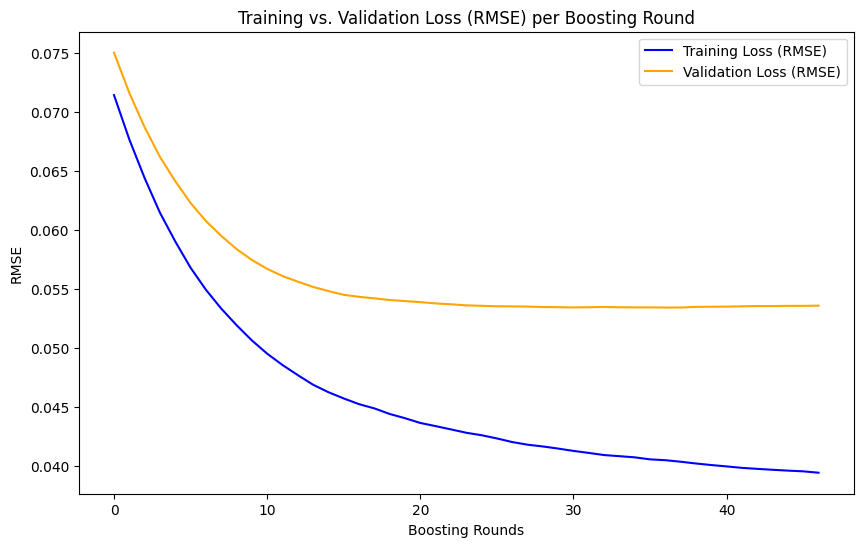

XGBoost - MSE: 0.00, R²: 0.54, RMSE: 0.05


In [99]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, #this affects the r2 th emost
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


# outlier detection attempts

In [100]:
from sklearn.cluster import DBSCAN
import hdbscan

first_11_pcs_copy = first_11_pcs_df.copy()
# DBSCAN clustering
dbscan = DBSCAN(eps=7, min_samples=10)
dbscan_labels = dbscan.fit_predict(first_11_pcs_copy)

# HDBSCAN clustering (if you prefer hierarchical)
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=216)
hdbscan_labels = hdbscan_model.fit_predict(first_11_pcs_copy)

# Print cluster info
print(f"DBSCAN clusters: {set(dbscan_labels)}")
print(f"HDBSCAN clusters: {set(hdbscan_labels)}")


DBSCAN clusters: {0, 1, 2, 3, 4, -1}
HDBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1}


In [101]:
import pandas as pd
from collections import Counter

# Analyze cluster sizes
cluster_counts = Counter(dbscan_labels)
print(f"Cluster sizes: {cluster_counts}")

# Mark small clusters (e.g., < 5 points) as outliers
outlier_clusters = {cluster for cluster, size in cluster_counts.items() if size < 3}
first_11_pcs_copy['Cluster'] = dbscan_labels
first_11_pcs_copy['Is_Outlier'] = first_11_pcs_copy['Cluster'].apply(lambda x: x in outlier_clusters)


Cluster sizes: Counter({0: 14572, 4: 341, 3: 191, 1: 25, 2: 11, -1: 9})


In [103]:
# Profile clusters by feature means/medians
cluster_profiles = first_11_pcs_copy.groupby('Cluster').mean()

# Identify key features for each cluster
top_features = {}
for cluster in cluster_profiles.index:
    if cluster == -1:  # Skip noise
        continue
    top_features[cluster] = cluster_profiles.loc[cluster].nlargest(3).index.tolist()

# Assign descriptive names to clusters
cluster_names = {cluster: f"Cluster-{cluster} ({', '.join(features)})"
                 for cluster, features in top_features.items()}
first_11_pcs_copy['Cluster_Name'] = first_11_pcs_copy['Cluster'].map(cluster_names)


In [104]:
from sklearn.cluster import DBSCAN
import hdbscan
import numpy as np
from collections import Counter
first_11_pcs_copy = first_11_pcs_df.copy()

# Scaling data (ensure the data is standardized)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(first_11_pcs_copy)

# DBSCAN clustering with adjusted parameters
dbscan = DBSCAN(eps=7, min_samples=10)  # Adjusted eps and min_samples
dbscan_labels = dbscan.fit_predict(scaled_data)

# HDBSCAN clustering with adjusted parameters
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=10)  # Adjusted params
hdbscan_labels = hdbscan_model.fit_predict(scaled_data)

# Cluster sizes and outlier marking for DBSCAN
dbscan_cluster_counts = Counter(dbscan_labels)
dbscan_outliers = {cluster for cluster, size in dbscan_cluster_counts.items() if size < 3}

first_11_pcs_copy['DBSCAN_Cluster'] = dbscan_labels
first_11_pcs_copy ['Is_Outlier_DBSCAN'] = first_11_pcs_copy ['DBSCAN_Cluster'].apply(lambda x: x in dbscan_outliers)

# Profiling clusters for feature analysis
dbscan_profiles = first_11_pcs_copy .groupby('DBSCAN_Cluster').mean()
dbscan_top_features = {
    cluster: dbscan_profiles.loc[cluster].nlargest(3).index.tolist()
    for cluster in dbscan_profiles.index if cluster != -1
}

# Assign cluster names
dbscan_cluster_names = {
    cluster: f"Cluster-{cluster} ({', '.join(features)})"
    for cluster, features in dbscan_top_features.items()
}
first_11_pcs_copy['Cluster_Name_DBSCAN'] = first_11_pcs_copy['DBSCAN_Cluster'].map(dbscan_cluster_names)

# Print results
print(f"DBSCAN clusters: {set(dbscan_labels)}")
print(f"DBSCAN cluster sizes: {dbscan_cluster_counts}")
print(f"HDBSCAN clusters: {set(hdbscan_labels)}")


DBSCAN clusters: {0, 1, 2, 3, -1}
DBSCAN cluster sizes: Counter({0: 14913, 3: 191, 1: 30, 2: 11, -1: 4})
HDBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 1

In [105]:
import pandas as pd

first_11_pcs_copy2 = pd.get_dummies(first_11_pcs_copy, drop_first=True)

# View the resulting DataFrame
first_11_pcs_copy2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15149 entries, 0 to 15148
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   PC1                                             15149 non-null  float64
 1   PC2                                             15149 non-null  float64
 2   PC3                                             15149 non-null  float64
 3   PC4                                             15149 non-null  float64
 4   PC5                                             15149 non-null  float64
 5   PC6                                             15149 non-null  float64
 6   PC7                                             15149 non-null  float64
 7   PC8                                             15149 non-null  float64
 8   PC9                                             15149 non-null  float64
 9   PC10                                   

## outlier detection wiht XGB

In [106]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------
# Local Outlier Factor (LOF)
# -----------------
print("Detecting outliers using Local Outlier Factor (LOF)...")
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
lof_outlier_labels = lof.fit_predict(X_train_scaled)  # -1 for outliers

# Filter out outliers from the training data
X_train_lof_cleaned = X_train_scaled[lof_outlier_labels == 1]
y_train_lof_cleaned = y_train[lof_outlier_labels == 1]

# Add LOF labels as features
lof_train_labels = (lof_outlier_labels == 1).astype(int)  # Convert to binary 1/0
X_train_lof = np.hstack([X_train_scaled, lof_train_labels.reshape(-1, 1)])
X_test_lof = np.hstack([X_test_scaled, np.ones((X_test_scaled.shape[0], 1))])  # Assume all test points are inliers

# Train and evaluate XGBRegressor with LOF
xgb_model_lof = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_lof.fit(X_train_lof, y_train)
lof_y_pred = xgb_model_lof.predict(X_test_lof)
lof_rmse = mean_squared_error(y_test, lof_y_pred, squared=False)  # RMSE
lof_r2 = r2_score(y_test, lof_y_pred)
print(f"LOF - RMSE: {lof_rmse:.2f}, R²: {lof_r2:.2f}")

# -----------------
# Isolation Forest
# -----------------
print("Detecting outliers using Isolation Forest...")
isolation_forest = IsolationForest(n_estimators=100, contamination=0.25, random_state=42)
outlier_train_labels = isolation_forest.fit_predict(X_train_scaled)
outlier_test_labels = isolation_forest.predict(X_test_scaled)

# Filter out outliers from the training data
X_train_cleaned = X_train_scaled[outlier_train_labels == 1]
y_train_cleaned = y_train[outlier_train_labels == 1]

# Add Isolation Forest labels as features
X_train_outliers = np.hstack([X_train_scaled, outlier_train_labels.reshape(-1, 1)])
X_test_outliers = np.hstack([X_test_scaled, outlier_test_labels.reshape(-1, 1)])

# Train and evaluate XGBRegressor with Isolation Forest
xgb_model_outliers = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_outliers.fit(X_train_outliers, y_train)
outlier_y_pred = xgb_model_outliers.predict(X_test_outliers)
outlier_rmse = mean_squared_error(y_test, outlier_y_pred, squared=False)  # RMSE
outlier_r2 = r2_score(y_test, outlier_y_pred)
print(f"Isolation Forest - RMSE: {outlier_rmse:.2f}, R²: {outlier_r2:.2f}")

# -----------------
# One-Class SVM
# -----------------
print("Detecting outliers using One-Class SVM...")
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
svm_outlier_labels_train = one_class_svm.fit_predict(X_train_scaled)  # -1 for outliers
svm_outlier_labels_test = one_class_svm.predict(X_test_scaled)

# Add One-Class SVM labels as features
svm_train_labels = (svm_outlier_labels_train == 1).astype(int)  # Convert to binary 1/0
svm_test_labels = (svm_outlier_labels_test == 1).astype(int)
X_train_svm = np.hstack([X_train_scaled, svm_train_labels.reshape(-1, 1)])
X_test_svm = np.hstack([X_test_scaled, svm_test_labels.reshape(-1, 1)])

# Train and evaluate XGBRegressor with One-Class SVM
xgb_model_svm = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_svm.fit(X_train_svm, y_train)
svm_y_pred = xgb_model_svm.predict(X_test_svm)
svm_rmse = mean_squared_error(y_test, svm_y_pred, squared=False)  # RMSE
svm_r2 = r2_score(y_test, svm_y_pred)
print(f"One-Class SVM - RMSE: {svm_rmse:.2f}, R²: {svm_r2:.2f}")


Detecting outliers using Local Outlier Factor (LOF)...


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LOF - RMSE: 0.05, R²: 0.53
Detecting outliers using Isolation Forest...


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Isolation Forest - RMSE: 0.05, R²: 0.53
Detecting outliers using One-Class SVM...
One-Class SVM - RMSE: 0.05, R²: 0.53


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure both X_train_new and y_train have the same index
X_train_new = X_train_new.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# 1. Train Model 1 (Outlier Model)
# Extract outliers
X_outliers = X_train_new[X_train_new['combined_outlier'] == 1].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1
)
y_outliers = y_train[X_train_new['combined_outlier'] == 1]

# Model 1: Train on outliers
outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
outlier_model.fit(X_outliers, y_outliers)

# 2. Train Model 2 (Non-Outlier Model)
# Extract non-outliers
X_non_outliers = X_train_new[X_train_new['combined_outlier'] == 0].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1
)
y_non_outliers = y_train[X_train_new['combined_outlier'] == 0]

# Model 2: Train on non-outliers
non_outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
non_outlier_model.fit(X_non_outliers, y_non_outliers)

# 3. Stack the models' predictions
# Make predictions using both models on the test set
X_test_new = X_test_new.reset_index(drop=True)
X_test_outliers = X_test_new[X_test_new['combined_outlier'] == 1].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1
)
X_test_non_outliers = X_test_new[X_test_new['combined_outlier'] == 0].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1
)

# Model 1 predictions (for outliers)
predictions_outliers = outlier_model.predict(X_test_outliers)

# Model 2 predictions (for non-outliers)
predictions_non_outliers = non_outlier_model.predict(X_test_non_outliers)

# Combine predictions: Stack the results
predictions_stacked = np.zeros_like(y_test)
predictions_stacked[X_test_new['combined_outlier'] == 1] = predictions_outliers
predictions_stacked[X_test_new['combined_outlier'] == 0] = predictions_non_outliers

# 4. Evaluate the stacked model
def evaluate_model(predictions, y_true, label="Stacked Model"):
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, predictions)
    mad = np.mean(np.abs(predictions - np.median(y_true)))
    tail_rmse = np.sqrt(np.mean((predictions[y_true > np.quantile(y_true, 0.95)] - y_true[y_true > np.quantile(y_true, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the stacked model
evaluate_model(predictions_stacked, y_test, label="Stacked Model")


Stacked Model - MSE: 0.00, RMSE: 0.05, R²: 0.52, MAD: 0.05, Tail RMSE: 0.04


array([1.05183268, 1.02107918, 0.81778544, ..., 0.9802497 , 0.95843077,
       0.95580935])

In [109]:

feature_importances_xgb = xgb_model_trained.get_score(importance_type='weight')

# Convert to DataFrame for easy handling
feature_importances_xgb  = pd.DataFrame(
    list(feature_importances_xgb.items()), columns=['Feature Id', 'Importance']
)

# Sort features by importance in descending order
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
feature_importances_xgb

Feature Importances:


,Feature Id,Importance
1,PC2,469.0
5,PC6,377.0
0,PC1,244.0
9,PC10,236.0
8,PC9,226.0
2,PC3,190.0
6,PC7,179.0
3,PC4,167.0
4,PC5,163.0
7,PC8,147.0


In [110]:
feature_importances_xgb[feature_importances_xgb['Importance'] > 90]

,Feature Id,Importance
1,PC2,469.0
5,PC6,377.0
0,PC1,244.0
9,PC10,236.0
8,PC9,226.0
2,PC3,190.0
6,PC7,179.0
3,PC4,167.0
4,PC5,163.0
7,PC8,147.0


## grid search XGB

In [62]:
'''
from xgboost import XGBRegressor, DMatrix, train, cv
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters tuning with grid search
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1]
}

# Initialize and train with GridSearchCV
xgb_grid = XGBRegressor(random_state=42, objective='reg:squarederror')
grid_search = GridSearchCV(xgb_grid, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator found by GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Use DMatrix for early stopping and evaluation tracking
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Prepare params for DMatrix training
params = best_xgb_model.get_params()
params['objective'] = 'reg:squarederror'

# Perform training with early stopping
evals_result = {}
best_xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=15,
    verbose_eval=True,
    evals_result=evals_result
)

# Plot training vs validation losses for analysis
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Predict on the test set
xgb_y_pred = best_xgb_model_trained.predict(dtest)

# Evaluate performance
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse
'''

"\nfrom xgboost import XGBRegressor, DMatrix, train, cv\nfrom sklearn.model_selection import GridSearchCV\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Hyperparameters tuning with grid search\nparam_grid = {\n    'n_estimators': [200, 300, 400],\n    'learning_rate': [0.01, 0.05, 0.1],\n    'max_depth': [4, 5, 6],\n    'subsample': [0.7, 0.8, 1.0],\n    'colsample_bytree': [0.7, 0.8, 1.0],\n    'reg_alpha': [0.01, 0.1, 1],\n    'reg_lambda': [0.01, 0.1, 1]\n}\n\n# Initialize and train with GridSearchCV\nxgb_grid = XGBRegressor(random_state=42, objective='reg:squarederror')\ngrid_search = GridSearchCV(xgb_grid, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Use the best estimator found by GridSearchCV\nbest_xgb_model = grid_search.best_estimator_\n\n# Use DMatrix for early stopping and evaluation tracking\ndtrain = DMatrix(X_train, label=y_train)\ndtest = DMatrix(X_test, label=y_test)\n\n# Prepare params for DMatrix training\npa

## XGB with PCA plot and catboost residual plot

Cross-Validated MSE (XGBoost): 0.00
[0]	train-rmse:0.07141	eval-rmse:0.07501
[1]	train-rmse:0.06766	eval-rmse:0.07160
[2]	train-rmse:0.06438	eval-rmse:0.06869
[3]	train-rmse:0.06144	eval-rmse:0.06618
[4]	train-rmse:0.05901	eval-rmse:0.06411
[5]	train-rmse:0.05678	eval-rmse:0.06227
[6]	train-rmse:0.05491	eval-rmse:0.06074
[7]	train-rmse:0.05332	eval-rmse:0.05948
[8]	train-rmse:0.05191	eval-rmse:0.05836
[9]	train-rmse:0.05062	eval-rmse:0.05744
[10]	train-rmse:0.04949	eval-rmse:0.05668
[11]	train-rmse:0.04853	eval-rmse:0.05608
[12]	train-rmse:0.04768	eval-rmse:0.05560
[13]	train-rmse:0.04686	eval-rmse:0.05515
[14]	train-rmse:0.04623	eval-rmse:0.05480
[15]	train-rmse:0.04570	eval-rmse:0.05448
[16]	train-rmse:0.04521	eval-rmse:0.05431
[17]	train-rmse:0.04485	eval-rmse:0.05418
[18]	train-rmse:0.04438	eval-rmse:0.05404
[19]	train-rmse:0.04402	eval-rmse:0.05395
[20]	train-rmse:0.04362	eval-rmse:0.05386
[21]	train-rmse:0.04335	eval-rmse:0.05375
[22]	train-rmse:0.04307	eval-rmse:0.05368
[23]	tra

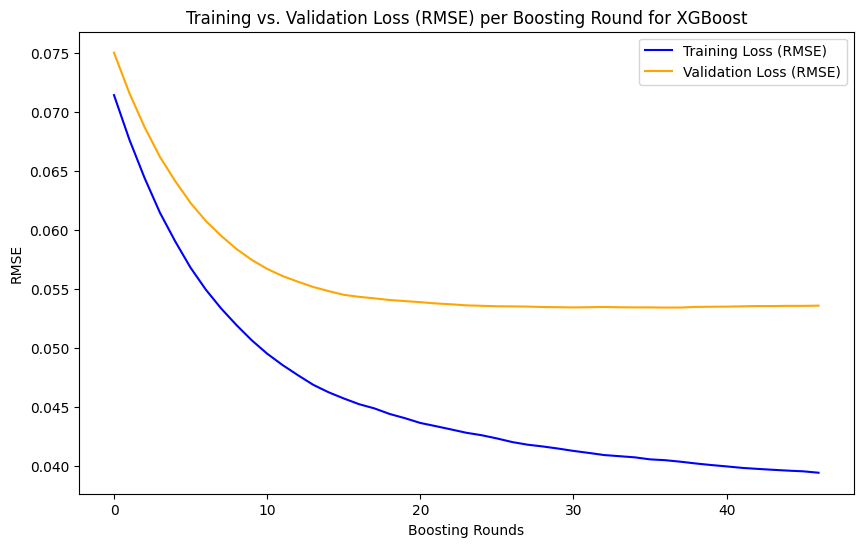

XGBoost - MSE: 0.00, R²: 0.54, RMSE: 0.05


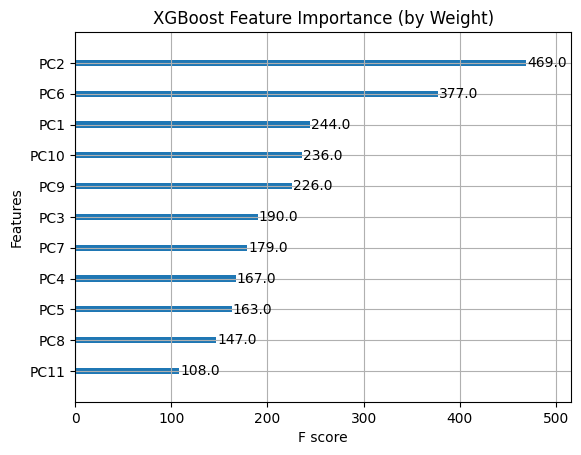

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0722449	test: 0.0757390	best: 0.0757390 (0)	total: 3.98ms	remaining: 1.99s
50:	learn: 0.0460664	test: 0.0534592	best: 0.0534592 (50)	total: 171ms	remaining: 1.51s
100:	learn: 0.0440680	test: 0.0531119	best: 0.0531119 (100)	total: 327ms	remaining: 1.29s
150:	learn: 0.0427627	test: 0.0529816	best: 0.0529816 (149)	total: 479ms	remaining: 1.11s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.05289965857
bestIteration = 187

Shrink model to first 188 iterations.
CatBoost - MSE: 0.00, R²: 0.55, RMSE: 0.05


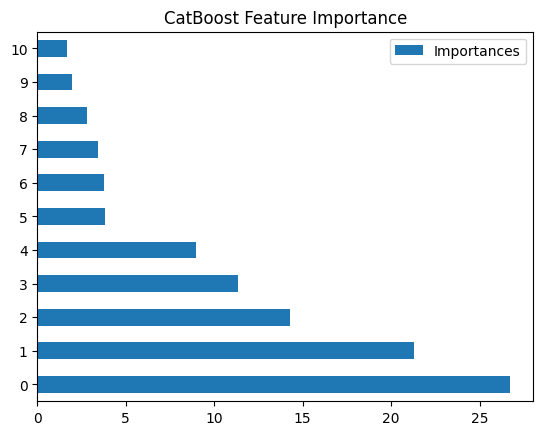

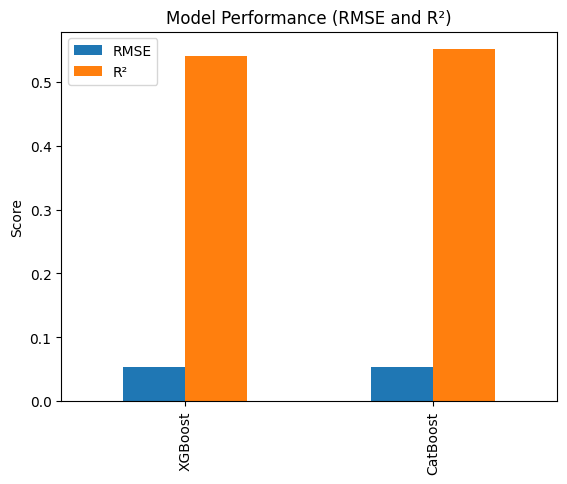

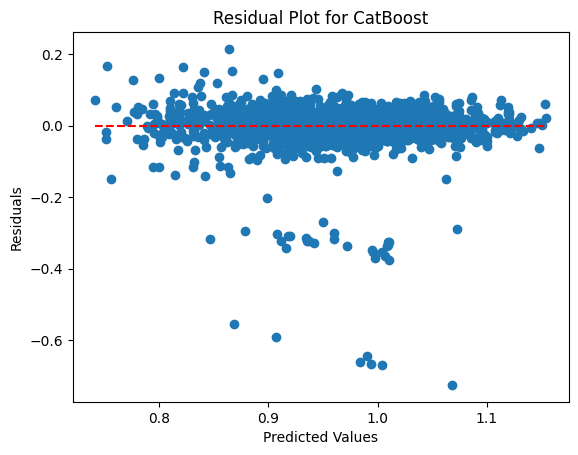

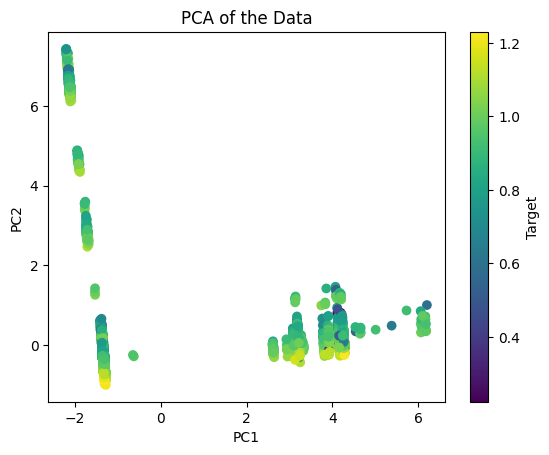

In [113]:
# Import required libraries
from xgboost import XGBRegressor, DMatrix, train, plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- XGBoost Code ---

# Initialize XGBRegressor with regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Cross-validation to estimate model performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE (XGBoost): {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for XGBoost training
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Evaluate both train and validation losses during training
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract losses from evals_result
train_loss_xgb = evals_result['train']['rmse']
validation_loss_xgb = evals_result['eval']['rmse']

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_xgb, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss_xgb, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round for XGBoost')
plt.legend()
plt.show()

# Make predictions and evaluate performance
xgb_y_pred = xgb_model_trained.predict(dtest)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")

# Feature importance plot for XGBoost
plot_importance(xgb_model_trained, importance_type='weight', title='XGBoost Feature Importance (by Weight)')
plt.show()

# --- CatBoost Code ---

# Identify categorical features and prepare data pools
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Initialize and train CatBoost with early stopping
catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    eval_metric='RMSE',
    cat_features=categorical_features_indices
)

# Fit the model with early stopping and log evaluation metrics
catboost_model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10
)

# Make predictions and evaluate performance
catboost_y_pred = catboost_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_r2 = r2_score(y_test, catboost_y_pred)
catboost_rmse = np.sqrt(catboost_mse)

print(f"CatBoost - MSE: {catboost_mse:.2f}, R²: {catboost_r2:.2f}, RMSE: {catboost_rmse:.2f}")

# Feature importance plot for CatBoost
feature_importance = pd.DataFrame(catboost_model.get_feature_importance(prettified=True))
feature_importance.plot(kind='barh', title='CatBoost Feature Importance')
plt.show()

# --- Additional Metrics Plot ---

# Compile and plot model performance metrics
metrics = {'RMSE': [xgb_rmse, catboost_rmse], 'R²': [xgb_r2, catboost_r2]}
df_metrics = pd.DataFrame(metrics, index=['XGBoost', 'CatBoost'])

df_metrics.plot(kind='bar', title="Model Performance (RMSE and R²)")
plt.ylabel("Score")
plt.show()

# --- Residual Plot ---

# Calculate residuals and plot residuals vs predictions
residuals = y_test - catboost_y_pred
plt.scatter(catboost_y_pred, residuals)
plt.hlines(y=0, xmin=min(catboost_y_pred), xmax=max(catboost_y_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for CatBoost')
plt.show()

# --- PCA Analysis (optional) ---

# PCA plot to visualize data clusters based on target
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)  # Replace X with your data
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y, cmap='viridis')  # Replace y with your labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the Data')
plt.colorbar(label='Target')
plt.show()


# end of code testing main models

## Gradient boosting

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, and y_test
# For example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")


Gradient Boosting - MSE: 0.00, R²: 0.54, RMSE: 0.05


Gradient boost grid search

In [ ]:
'''
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
}

# Create Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up Grid Search
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=1)
gb_grid_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_

# Predictions
gb_y_pred = best_gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)

print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")
'''

## Old models- not tuned or doesn't work

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Split your data
X_train, X_test, y_train, y_test = train_test_split(first_11_pcs_df, one_hot_encoded_df2['proficient_score'], test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}, RMSE: {rf_rmse:.2f}")


Random Forest - MSE: 0.00, R²: 0.48, RMSE: 0.06


In [19]:
#grid search random forest
'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split your data
X_train, X_test, y_train, y_test = train_test_split(
    first_11_pcs_df,
    one_hot_encoded_df2['proficient_score'],
    test_size=0.2,
    random_state=42
)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [5]
}

rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV for tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Predictions
rf_y_pred = best_rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest - Best Parameters: {grid_search.best_params_}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}, RMSE: {rf_rmse:.2f}")
'''


Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - MSE: 0.01, R²: 0.62, RMSE: 0.12


In [122]:
from sklearn.neighbors import KNeighborsRegressor

# Train K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
knn_y_pred = knn_model.predict(X_test)

# Evaluate
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)

print(f"K-Nearest Neighbors - MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}, RMSE: {knn_rmse:.2f}")


K-Nearest Neighbors - MSE: 0.00, R²: 0.51, RMSE: 0.06


Stacked Model - MSE: 0.00, R²: 0.55, RMSE: 0.05


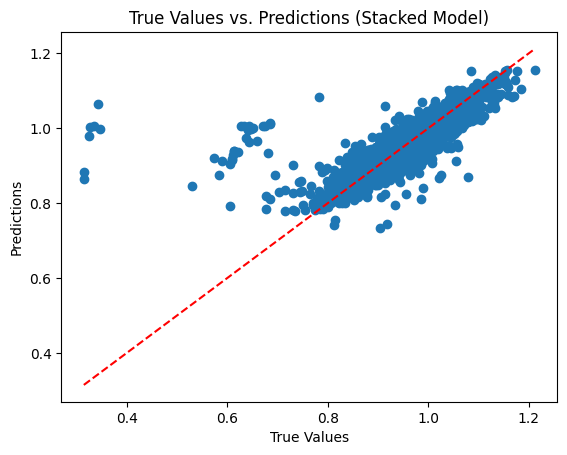

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(
    first_55_pcs_df,
    one_hot_encoded_df2['proficient_score'],
    test_size=0.2,
    random_state=42
)

# Step 2: Random Forest Model with K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_train_preds = np.zeros(X_train.shape[0])
rf_test_preds = np.zeros(X_test.shape[0])

for train_index, val_index in kf.split(X_train):
    X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]  # Use iloc here
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
    rf_model.fit(X_kf_train, y_kf_train)
    
    rf_train_preds[val_index] = rf_model.predict(X_kf_val)

rf_test_preds = rf_model.predict(X_test)

# Step 3: CatBoost Model with K-Fold
cat_train_preds = np.zeros(X_train.shape[0])
cat_test_preds = np.zeros(X_test.shape[0])

for train_index, val_index in kf.split(X_train):
    X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]  # Use iloc here
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
    train_pool = Pool(X_kf_train, y_kf_train, cat_features=categorical_features_indices)
    validation_pool = Pool(X_kf_val, y_kf_val, cat_features=categorical_features_indices)

    catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
    catboost_model.fit(train_pool, eval_set=validation_pool, use_best_model=True)

    cat_train_preds[val_index] = catboost_model.predict(X_kf_val)

cat_test_preds = catboost_model.predict(X_test)


# Step 4: Stack Predictions
stacked_train = np.column_stack((rf_train_preds, cat_train_preds))
stacked_test = np.column_stack((rf_test_preds, cat_test_preds))

# Fit the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_train, y_train)

# Make final predictions using the meta-model
final_predictions = meta_model.predict(stacked_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Stacked Model - MSE: {final_mse:.2f}, R²: {final_r2:.2f}, RMSE: {final_rmse:.2f}")

# Optional: Visualizing the performance of the stacked model
plt.scatter(y_test, final_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Stacked Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()


# not needed (models dont work well)

In [125]:
from sklearn.svm import SVR

# Train Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predictions
svr_y_pred = svr_model.predict(X_test)

# Evaluate
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)

print(f"Support Vector Regressor - MSE: {svr_mse:.2f}, R²: {svr_r2:.2f}, RMSE: {svr_rmse:.2f}")


Support Vector Regressor - MSE: 0.00, R²: 0.39, RMSE: 0.06


In [128]:
from sklearn.linear_model import Ridge

# Train Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Predictions
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")


Ridge Regression - MSE: 0.01, R²: 0.11, RMSE: 0.07


In [186]:
'''
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Define the LightGBM model
print("Defining the LightGBM model...")
lgb_model = lgb.LGBMRegressor(random_state=42)

# Step 2: Set up the parameter grid for hyperparameter tuning
print("Setting up the parameter grid for hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 3, 5, 7],
    'num_leaves': [31, 63, 127],
    'subsample': [0.6, 0.8, 1.0],
}

# Step 3: Create a custom scoring function to track progress
def verbose_grid_search(estimator, param_grid, X, y):
    print("Starting Grid Search...")
    for n_estimators in param_grid['n_estimators']:
        for learning_rate in param_grid['learning_rate']:
            for max_depth in param_grid['max_depth']:
                for num_leaves in param_grid['num_leaves']:
                    for subsample in param_grid['subsample']:
                        print(f"Evaluating: n_estimators={n_estimators}, learning_rate={learning_rate}, "
                              f"max_depth={max_depth}, num_leaves={num_leaves}, subsample={subsample}")
                        # Fit the model with current parameters
                        estimator.set_params(n_estimators=n_estimators, learning_rate=learning_rate,
                                              max_depth=max_depth, num_leaves=num_leaves, subsample=subsample)
                        estimator.fit(X, y)

# Perform Grid Search with verbose output
print("Performing custom Grid Search with detailed progress...")
verbose_grid_search(lgb_model, param_grid, X_train, y_train)

# Step 4: After manually searching, you would store the best parameters manually based on your criteria.

# Step 5: Make predictions using the best model (you can specify your best parameters here)
print("Making predictions using the best LightGBM model...")
best_lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, num_leaves=31, subsample=1.0, random_state=42)
best_lgb_model.fit(X_train, y_train)
lgb_y_pred = best_lgb_model.predict(X_test)

# Step 6: Evaluate the LightGBM model
print("Evaluating the LightGBM model...")
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

print(f"LightGBM - MSE: {lgb_mse:.2f}, R²: {lgb_r2:.2f}, RMSE: {lgb_rmse:.2f}")
'''

'\nimport lightgbm as lgb\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error, r2_score\nimport numpy as np\n\n# Step 1: Define the LightGBM model\nprint("Defining the LightGBM model...")\nlgb_model = lgb.LGBMRegressor(random_state=42)\n\n# Step 2: Set up the parameter grid for hyperparameter tuning\nprint("Setting up the parameter grid for hyperparameter tuning...")\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [-1, 3, 5, 7],\n    \'num_leaves\': [31, 63, 127],\n    \'subsample\': [0.6, 0.8, 1.0],\n}\n\n# Step 3: Create a custom scoring function to track progress\ndef verbose_grid_search(estimator, param_grid, X, y):\n    print("Starting Grid Search...")\n    for n_estimators in param_grid[\'n_estimators\']:\n        for learning_rate in param_grid[\'learning_rate\']:\n            for max_depth in param_grid[\'max_depth\']:\n                for num_leaves in param_grid[\'nu